In [84]:
from Bending.FullBending import FullBending
import numpy as np
import pandas as pd

In [85]:
# Material properties

df_layers = pd.DataFrame({ 'E': [0.800000	,   # nucleo
                                 5.198613	,   # X
                                 2.814443		,   # SX
                                 21.284290    ,   # Y
                                 5.775806]}  ,   # SY
                                 index=['nucleo', 'X', 'SX', 'Y', 'SY'])

St_layers = {
    "X"   : 481.083731,   # MPa
    "SX"  : 80.120493,    # MPa
    "Y"   : 667.663085,   # MPa
    "SY"  : 127.036236,   # MPa
    "nucleo" : 0.0,
}


params = {
            "geo" : {
                        "t_n" : 3.073400,
                        "t_l" : 0.427120,
                        "Lx"  : 30,
                        "meshsizefactor" : 1.1,
                    },
            "sim" : {
                        "disp" : 2.0,
                        "opt": {
                                    "OMP_NUM_THREADS":4,
                                    "mpi_np":4,
                                    "mpi":False
                                }
                    },
            "tensile" : {
                        "disp" : 2.0,
                        "St_layers": St_layers,
                    },
        }


In [86]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y", "SX" , "SY"],
        ["Y", "X"  , "SY"]
    ]


In [87]:
df_data = pd.read_csv("experimental.csv")
df_data["Modulo flexion [GPa]"] =  df_data["Modulo flexion [MPa]"]/1000
df_data = df_data.drop(columns=["Modulo flexion [MPa]"])
df_data = df_data.drop(columns=["Tension maxima [MPa]"])
df_data["Espesor [mm]"] = 0.5*df_data["Espesor [mm]"] + 0.5*df_data["Espesor_2 [mm]"]
df_data = df_data.drop(columns=["Espesor_2 [mm]"])

# 
#  Ancho [mm]-> B [mm]
#  Espesor [mm] -> t [mm]
#  Modulo flexion [MPa] -> E [GPa]

df_data["B [mm]"] = df_data["Ancho [mm]"]
df_data["t [mm]"] = df_data["Espesor [mm]"]
df_data["E [GPa]"] = df_data["Modulo flexion [GPa]"]

df_data = df_data.drop(columns=["Ancho [mm]"])
df_data = df_data.drop(columns=["Espesor [mm]"])
df_data = df_data.drop(columns=["Modulo flexion [GPa]"])

df_stats = df_data.groupby('Nombre').agg(['mean', 'std'])
df_stats["layers"] = composition

St_TFP = [ 279.1, 153.4 , 137.1 , 184.4 , 100.0 , 104.5 ]
df_stats["St [MPa]"] = St_TFP



In [88]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers St [MPa]  
                              
Nombre                        
TFP1-1       [Y, Y]    279.1  
TFP2-1       [Y, X]    153.4  
TFP3-1      [Y, SX]    137.1  
TFP4-1      [Y, SY]    184.4  
TFP5-1  [Y, SX, SY]    100.0  
TFP6-1   [Y, X, SY]    104.5

In [89]:
from validation.FullExperimental import FullExperimental

full = FullExperimental()
full

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]               b [mm]            \
           mean       std      mean       std       mean       std   
Name                                                                 
TFP1  13.201050  0.630858  5.266667  0.057735  25.600000  0.100000   
TFP2   9.869501  0.780113  4.700000  0.000000  25.566667  0.057735   
TFP3   9.222003  0.495965  4.833333  0.057735  25.400000  0.173205   
TFP4  10.181815  0.770635  4.700000  0.000000  25.666667  0.152753   
TFP5   6.143105  0.161637  5.700000  0.000000  25.166667  0.152753   
TFP6   7.798060  0.334186  5.600000  0.000000  25.033333  0.635085   

        Sb [MPa]                  layers     Vc  
            mean        std                      
Name                                             
TFP1  134.996667  18.942693          [Y]  0.178  
TFP2  117.430000  15.759607       [Y, X]  0.164  
TFP3  128.053333   5.337905      [Y, SX]  0.135  
TFP4  141.703333   7.525386      [Y, SY]  0.144  
TFP5  107.433333   3.902939  [Y, SX, SY]  0.146  
TFP6  114.306667  11.800790   [Y, X, SY]  0.180

In [61]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers St [MPa]  
                              
Nombre                        
TFP1-1       [Y, Y]    279.1  
TFP2-1       [Y, X]    153.4  
TFP3-1      [Y, SX]    137.1  
TFP4-1      [Y, SY]    184.4  
TFP5-1  [Y, SX, SY]    100.0  
TFP6-1   [Y, X, SY]    104.5

In [62]:
import os 
from copy import deepcopy
join = os.path.join


if not os.path.exists("output"):
    os.mkdir("output")

In [63]:
df_layers

,E
nucleo,0.800000
X,5.198613
SX,2.814443
Y,21.284290
SY,5.775806


In [64]:
tl = params["geo"]["t_l"]
tn = params["geo"]["t_n"]
En = df_layers.loc["nucleo"]["E"]
EY = df_layers.loc["Y"]["E"]

In [65]:
(En*tn + 2*(2*EY*tl) )/(tn + 2*(2*tl) )

np.float64(8.11866959840063)

In [ ]:
El_vec = df_layers.iloc[1:].values.flatten()

all_params = []
E_pred = []
Et_pred = []
E_analy_pred = []
Et_analy_pred = []

Sb_pred = []
Sb_analy_pred = []

St_pred = []
St_analy_pred = []
for id_design in range(6):
    E_n =   df_layers.loc["nucleo"].values[-1]*1e3

    lyrs = df_stats["layers"].iloc[id_design]
    E_l = df_layers.loc[lyrs]["E"].values*1e3 # MPa


    name_mat = df_stats["layers"].iloc[id_design]
    name = df_stats.index[id_design]
    
    params_loop = deepcopy(params)

    params_loop["El"] = El_vec
    params_loop["geo"]["Ly"] = df_stats["B [mm]"]["mean"].iloc[id_design]
    params_loop["sim"]["E_n"] = E_n
    params_loop["sim"]["E_l"] = E_l
    params_loop["sim"]["name_mat"] = name_mat

    params_loop["output_folder"] = join("output", name)
    
    inp_f = FullBending(params_loop)
    # Eflex = params_loop["Eflex"]

    # E_pred.append(Eflex)
    # Et_pred.append(params_loop["Etensile"])
    all_params.append(params_loop)


    # E_analy_pred.append(params_loop["Eflexion_analytical"])
    # Et_analy_pred.append(params_loop["Etensile_analytical"])

    # St_pred.append(params_loop["rpost"]["S_prediction"])
    # St_analy_pred.append(1e3*params_loop["St_analytical"])

    # Sb_analy_pred.append(params_loop["Sb_analytical"])
    # Sb_pred.append(params_loop["rpostbending"])

    

Running Calculix at:  output\TFP1-1\sim
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1-1\sim\out.txt
Command:
 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  11528 

Calculix finished

['Y', 'Y', 'nucleo', 'Y', 'Y']
Time Step:
Time Step:
Time Step:
Running Calculix at:  output\TFP1-1\tensile
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1-1\tensile\out.txt
Command:
 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  6392 

Calculix finished

['Y', 'Y', 'nucleo', 'Y', 'Y']
Running Calculix at:  output\TFP2-1\sim
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP2-1\sim\out.txt
Command:
 c:\Us

In [68]:
df_stats["E pred [GPa]"]  = [ iall_params["Eflex"] for iall_params in all_params]
df_stats["Et pred [GPa]"] = [ iall_params["Etensile"] for iall_params in all_params]
df_stats["E analytical pred [GPa]"]  = [ iall_params["Eflexion_analytical"] for iall_params in all_params]
df_stats["Et analytical pred [GPa]"] = [ iall_params["Etensile_analytical"] for iall_params in all_params]
df_stats["S pred [MPa]"] =  [ iall_params["rpost"]["S_prediction"] for iall_params in all_params]
df_stats["Sb pred [MPa]"] = [ iall_params["rpostbending"] for iall_params in all_params]

df_stats["S analytical pred [MPa]"] = [ 1e3*iall_params["St_analytical"] for iall_params in all_params]
df_stats["Sb analytical pred [MPa]"] = [ iall_params["Sb_analytical"] for iall_params in all_params]

tau_pred  = [ iall_params["geo"]["t_t"] for iall_params in all_params]
B_span    = [ iall_params["geo"]["Ly"]  for iall_params in all_params]
df_stats["t pred [mm]"] = tau_pred
df_stats["B [mm]"] = B_span

In [69]:
df_stats

B [mm]               t [mm]              E [GPa]            \
             mean        std      mean       std       mean       std   
Nombre                                                                  
TFP1-1  25.600000  25.600000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  25.566667  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  25.400000  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  25.666667  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  25.166667  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  25.033333  5.566667  0.028868   7.798060  0.334186   

             layers St [MPa] E pred [GPa] Et pred [GPa]  \
                                                          
Nombre                                                    
TFP1-1       [Y, Y]    279.1    12.054057      8.118666   
TFP2-1       [Y, X]    153.4     7.292986      5.245108   
TFP3-1      [Y, SX]    137.1     6.474346      4.819198   
TFP4-1      [Y, SY]    184.4     7.485393      5.348218   
TFP5-1  [Y, SX, SY]    100.0     5.681276      4.964186   
TFP6-1   [Y, X, SY]    104.5     6.134949      5.325542   

       E analytical pred [GPa] Et analytical pred [GPa] S pred [MPa]  \
                                                                       
Nombre                                                                 
TFP1-1               15.845752                 8.118670   254.675318   
TFP2-1                8.673371                 5.245108   164.534137   
TFP3-1                7.610303                 4.819197   137.192761   
TFP4-1                8.930734                 5.348218   117.632884   
TFP5-1                6.896204                 4.964186   109.186090   
TFP6-1                7.545461                 5.325543   117.133943   

       Sb pred [MPa] S analytical pred [MPa] Sb analytical pred [MPa]  \
                                                                        
Nombre                                                                  
TFP1-1    404.213965              254.673094                 0.254673   
TFP2-1    507.755612              164.532841                 0.200318   
TFP3-1    227.322508              137.191067                 0.137191   
TFP4-1    158.622022              117.631630                 0.117632   
TFP5-1    154.469538              109.185015                 0.109185   
TFP6-1    166.969080              117.132906                 0.117133   

       t pred [mm]  
                    
Nombre              
TFP1-1     4.78188  
TFP2-1     4.78188  
TFP3-1     4.78188  
TFP4-1     4.78188  
TFP5-1     5.63612  
TFP6-1     5.63612

In [70]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Modulo Tracción [GPa]')

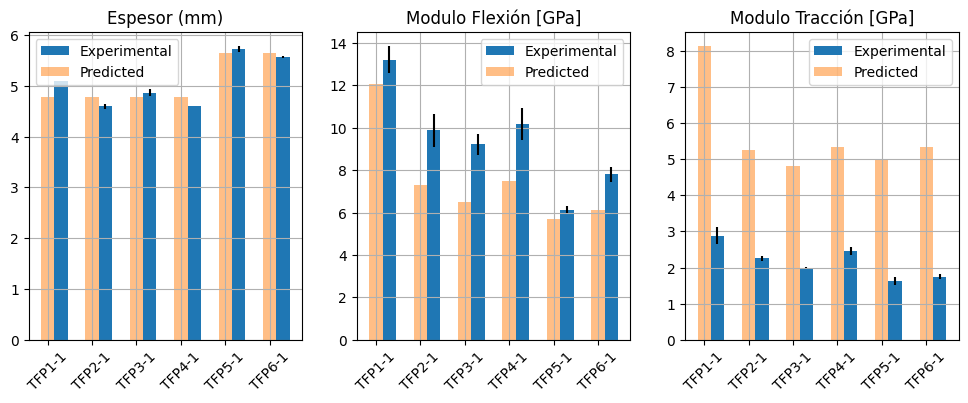

In [71]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

plt.bar(idx_range+width , df_stats['t [mm]']['mean'], yerr=df_stats['t [mm]']['std'], label='Experimental',width=width)
plt.bar(idx_range, tau_pred, label='Predicted', alpha=0.5, width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(132)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(133)

# plot bars with error bars St [MPa] and prediction
Et_exp = full["Et [GPa]"]["mean"]
Et_exp_err = full["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


In [72]:
df_stats

B [mm]               t [mm]              E [GPa]            \
             mean        std      mean       std       mean       std   
Nombre                                                                  
TFP1-1  25.600000  25.600000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  25.566667  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  25.400000  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  25.666667  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  25.166667  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  25.033333  5.566667  0.028868   7.798060  0.334186   

             layers St [MPa] E pred [GPa] Et pred [GPa]  \
                                                          
Nombre                                                    
TFP1-1       [Y, Y]    279.1    12.054057      8.118666   
TFP2-1       [Y, X]    153.4     7.292986      5.245108   
TFP3-1      [Y, SX]    137.1     6.474346      4.819198   
TFP4-1      [Y, SY]    184.4     7.485393      5.348218   
TFP5-1  [Y, SX, SY]    100.0     5.681276      4.964186   
TFP6-1   [Y, X, SY]    104.5     6.134949      5.325542   

       E analytical pred [GPa] Et analytical pred [GPa] S pred [MPa]  \
                                                                       
Nombre                                                                 
TFP1-1               15.845752                 8.118670   254.675318   
TFP2-1                8.673371                 5.245108   164.534137   
TFP3-1                7.610303                 4.819197   137.192761   
TFP4-1                8.930734                 5.348218   117.632884   
TFP5-1                6.896204                 4.964186   109.186090   
TFP6-1                7.545461                 5.325543   117.133943   

       Sb pred [MPa] S analytical pred [MPa] Sb analytical pred [MPa]  \
                                                                        
Nombre                                                                  
TFP1-1    404.213965              254.673094                 0.254673   
TFP2-1    507.755612              164.532841                 0.200318   
TFP3-1    227.322508              137.191067                 0.137191   
TFP4-1    158.622022              117.631630                 0.117632   
TFP5-1    154.469538              109.185015                 0.109185   
TFP6-1    166.969080              117.132906                 0.117133   

       t pred [mm]  
                    
Nombre              
TFP1-1     4.78188  
TFP2-1     4.78188  
TFP3-1     4.78188  
TFP4-1     4.78188  
TFP5-1     5.63612  
TFP6-1     5.63612

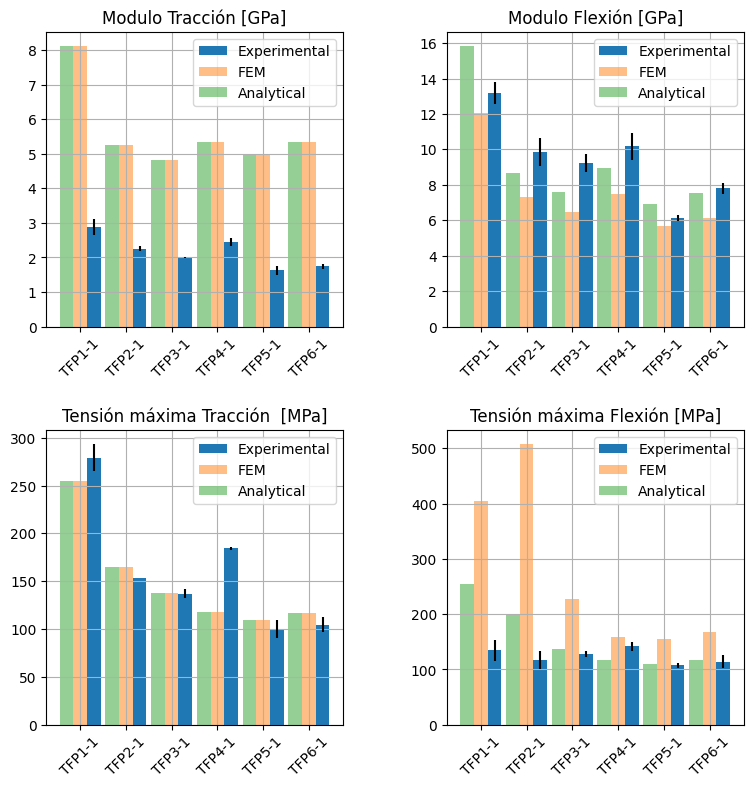

In [73]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 9))
# subplot 
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(222)

# plot bars with error bars Modulo Flexion [GPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['E analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(221)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = full["Et [GPa]"]["mean"]
Et_exp_err = full["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['Et analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


ax = fig.add_subplot(223)

# 
St_exp = full["St [MPa]"]["mean"]
St_exp_err = full["St [MPa]"]["std"]

plt.bar(idx_range+width , St_exp, yerr=St_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['S pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['S analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.legend()
plt.grid()
# off xlabel

plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Tensión máxima Tracción  [MPa]')
# ========================
ax = fig.add_subplot(224)

Sb_exp = full["Sb [MPa]"]["mean"]
Sb_exp_err = full["Sb [MPa]"]["std"]

plt.bar(idx_range+width , Sb_exp, yerr=Sb_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Sb pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, 1e3*df_stats['Sb analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.title('Tensión máxima Flexión [MPa]')
plt.xlabel('')
plt.xticks(rotation=45)
plt.xticks(idx_range, idx);
plt.legend()
plt.grid()

In [74]:
Et_exp

Name
TFP1    2.885509
TFP2    2.258503
TFP3    2.000437
TFP4    2.451362
TFP5    1.626582
TFP6    1.739870
Name: mean, dtype: float64

In [75]:
df_stats

B [mm]               t [mm]              E [GPa]            \
             mean        std      mean       std       mean       std   
Nombre                                                                  
TFP1-1  25.600000  25.600000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  25.566667  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  25.400000  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  25.666667  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  25.166667  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  25.033333  5.566667  0.028868   7.798060  0.334186   

             layers St [MPa] E pred [GPa] Et pred [GPa]  \
                                                          
Nombre                                                    
TFP1-1       [Y, Y]    279.1    12.054057      8.118666   
TFP2-1       [Y, X]    153.4     7.292986      5.245108   
TFP3-1      [Y, SX]    137.1     6.474346      4.819198   
TFP4-1      [Y, SY]    184.4     7.485393      5.348218   
TFP5-1  [Y, SX, SY]    100.0     5.681276      4.964186   
TFP6-1   [Y, X, SY]    104.5     6.134949      5.325542   

       E analytical pred [GPa] Et analytical pred [GPa] S pred [MPa]  \
                                                                       
Nombre                                                                 
TFP1-1               15.845752                 8.118670   254.675318   
TFP2-1                8.673371                 5.245108   164.534137   
TFP3-1                7.610303                 4.819197   137.192761   
TFP4-1                8.930734                 5.348218   117.632884   
TFP5-1                6.896204                 4.964186   109.186090   
TFP6-1                7.545461                 5.325543   117.133943   

       Sb pred [MPa] S analytical pred [MPa] Sb analytical pred [MPa]  \
                                                                        
Nombre                                                                  
TFP1-1    404.213965              254.673094                 0.254673   
TFP2-1    507.755612              164.532841                 0.200318   
TFP3-1    227.322508              137.191067                 0.137191   
TFP4-1    158.622022              117.631630                 0.117632   
TFP5-1    154.469538              109.185015                 0.109185   
TFP6-1    166.969080              117.132906                 0.117133   

       t pred [mm]  
                    
Nombre              
TFP1-1     4.78188  
TFP2-1     4.78188  
TFP3-1     4.78188  
TFP4-1     4.78188  
TFP5-1     5.63612  
TFP6-1     5.63612

In [76]:
df_save = pd.DataFrame({"Eb [GPa]": df_stats['E [GPa]']['mean'].values,
                        "Eb pred [GPa]": df_stats['E pred [GPa]'].values,
                        "Et [GPa]": full["Et [GPa]"]["mean"].values,
                        "Et pred [GPa]": df_stats['Et pred [GPa]'].values,
                        "Name": df_stats.index})

df_save.to_csv("output.csv", index=False)

In [77]:
params

{'geo': {'t_n': 3.0734, 't_l': 0.42712, 'Lx': 30, 'meshsizefactor': 1.1},
 'sim': {'disp': 2.0,
  'opt': {'OMP_NUM_THREADS': 4, 'mpi_np': 4, 'mpi': False}},
 'tensile': {'disp': 2.0,
  'St_layers': {'X': 481.083731,
   'SX': 80.120493,
   'Y': 667.663085,
   'SY': 127.036236,
   'nucleo': 0.0}}}

In [78]:
El = df_layers.loc["Y"].values
En = df_layers.loc["nucleo"].values
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]

In [79]:
print("El", El)
print("En", En)
print("tn", tn)
print("tl", tl)

El [21.28429]
En [0.8]
tn 3.0734
tl 0.42712


In [80]:
E_eff = (En*tn + 2*(2*El*tl)) / (tn + 2*(2*tl))
print(E_eff)

[8.1186696]


In [81]:
# numerico 
print(Et_pred[0])

8.118666485984601
